# Project: Traffic Sign Recognition Classifier
### Author: Aneeq Mahmood
### Email: aneeq.sdc@gmail.com



---
## Cell 1: Load The Data

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pickle as pk
from sklearn.utils import shuffle


# Load pickled data
image_dir = "traffic-signs-data/"            # Specify images directory
image_files = ["train.p","valid.p","test.p"]  # Specify training, validation, and test data


training_file = image_dir+image_files[0]
validation_file= image_dir+image_files[1]
testing_file = image_dir+image_files[2]


with (open(training_file, mode='rb')) as f:
    train = pk.load(f)
with open(validation_file, mode='rb') as f:
    valid = pk.load(f)
with open(testing_file, mode='rb') as f:
    test = pk.load(f)
    
X_train_normal, y_train = train['features'], train['labels']
X_valid_normal, y_valid = valid['features'], valid['labels']
X_test_normal, y_test = test['features'], test['labels']

# converting all data to float32
X_train_normal = X_train_normal.astype(np.float32, copy=False)
X_valid_normal = X_valid_normal.astype(np.float32, copy=False)
X_test_normal = X_test_normal.astype(np.float32, copy=False)

X_train = np.copy(X_train_normal)
X_valid = np.copy(X_valid_normal)
X_test = np.copy(X_test_normal)

print('finsihed')

finsihed


---

## Cell 1: Dataset Summary & Exploration
### Providing a Basic Summary of the Data Set Using Python, Numpy



In [2]:

##  Number of training examples
n_train = len(X_train)

##  Number of testing examples.
n_test = len(X_test)

##  Number of valid examples.
n_valid = len(X_valid)

## The shape of an traffic sign image?
image_shape = X_train[0].shape

## unique classes/labels there are in the dataset.

n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


## Cell 2: Visualize Data

View a sample from the dataset.

521
31


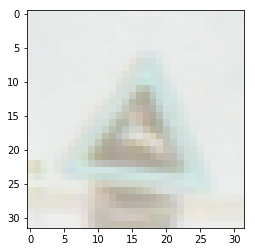

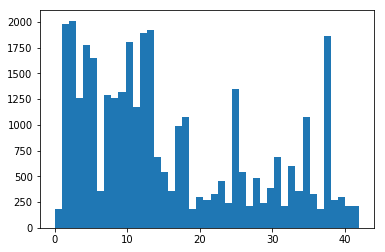

In [3]:
import random
import matplotlib.image as mpimg
%matplotlib inline  

index = random.randint(0, len(X_train))    # Printing random image from training data

image = X_train[index].squeeze()
print(index)
plt.figure()
plt.imshow(image)
print(y_train[index])                      # Printing class of that particular image

plt.figure()
_= plt.hist(y_train,43 )                  # Displaying histogram of the class distribution in the training set



## Cell 3: Model of the ConvNet



### Cell 3a: Pre-process the Data Set (normalization)
Normalize RGB images between -1 and +1

521
31


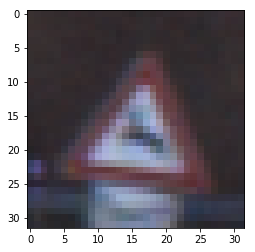

In [4]:
from sklearn.utils import shuffle

# Normalizing the traiing data
for q in range(len(X_train)):
    X_train[q][:,:,0] = (X_train_normal[q][:,:,0] - 128)/128.
    X_train[q][:,:,1] = (X_train_normal[q][:,:,1] - 128)/128.
    X_train[q][:,:,2] = (X_train_normal[q][:,:,2] - 128)/128.

# Display the preprocessed image, use the same image which was plotted under Cell 2
print(index)
image = X_train[index].squeeze()
print(y_train[index])
plt.figure()
plt.imshow(image)

X_train, y_train = shuffle(X_train, y_train)

# Doing the same for validation and test data
for q in range(len(X_valid)):
    X_valid[q][:,:,0] = (X_valid_normal[q][:,:,0] - 128)/128
    X_valid[q][:,:,1] = (X_valid_normal[q][:,:,1] - 128)/128
    X_valid[q][:,:,2] = (X_valid_normal[q][:,:,2] - 128)/128

for q in range(len(X_test)):
    X_test[q][:,:,0] = (X_test_normal[q][:,:,0] - 128)/128
    X_test[q][:,:,1] = (X_test_normal[q][:,:,1] - 128)/128
    X_test[q][:,:,2] = (X_test_normal[q][:,:,2] - 128)/128

### Cell 3b: Setup TensorFlow

In [5]:
import tensorflow as tf

BATCH_SIZE = 64
rate = 0.001
print("Done")

Done


### Cell 3c:  Convnet based on Yann Lecun's LeNet

The network mode l is based on Yann LeCun's 1998 paper; the filters and details within different layers have been modified to fit the model requirements, and match inputs and ouputs. The details are present in the writeup

In [6]:
from tensorflow.contrib.layers import flatten



def LeNet(x, keep_prob):    
    """
    x : training data
    keep_prob : probability for keeping weights, used in dropoffs
    """
    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))    # bias
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID',name='con1') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1,name='con1r')

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID',name='con1rp')

    # SOLUTION: Layer 2: Convolutional. Inputput = 14x14x6 ;  Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID',name='con2') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2,name='con2r')

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID',name='con2rp')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation. followed by dropout
    fc1    = tf.nn.relu(fc1,name='fc1')
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2,name='fc2')
    fc2 = tf.nn.dropout(fc2, keep_prob)
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    # returning logits
    return logits

### Cell 3d:  placeholders, optimizer, and other variables

In [7]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)    #  One hot vetor"s length matches number of classes



logits = LeNet(x,keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)

# Using Adam optimizer
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


### Cell 3e:  Model Evaluation Subroutine
Evaluate how well the loss and accuracy of the model for a given dataset.



In [83]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()   # Variable for saving tensorflow session


# Create a summary to monitor cost tensor
tf.summary.scalar("loss", loss_operation)
# Create a summary to monitor accuracy tensor
tf.summary.scalar("accuracy", accuracy_operation)
# Merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()


def evaluate(X_data, y_data):
    """
    X_data:   Input images
    y_label:   Labels for the input images
    """
    num_examples = len(X_data)
 
    total_accuracy = 0
    avg_cost =  0
    sess = tf.get_default_session()
    total_batches = int( num_examples / BATCH_SIZE )
    if (total_batches == 0): 
        total_batches = 1.0
    for offset in range(0, num_examples, BATCH_SIZE):
        
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        _,a,c,summary = sess.run([training_operation , accuracy_operation, loss_operation, merged_summary_op], feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (a * len(batch_x))
        avg_cost += c 
    return total_accuracy/num_examples, avg_cost/total_batches,total_accuracy


### Cell 3f: Run the model on training data

In [9]:
# Number fo epochs to run
EPOCHS = 30


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
#    saver.restore(sess, tf.train.latest_checkpoint('.'))
   
    print("Training...")
   
    tl = []
    ta = []
    vl = [] 
    va = [] 
    for i in range(EPOCHS):
        
        X_train, y_train = shuffle(X_train, y_train)
        loss_p_epoch = 0.0         # training loss per epoch
        acc_p_epoch = 0.0          # training accuracy per epoch
        total_batches = int( num_examples / BATCH_SIZE )
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            _, a,c,summary = sess.run([training_operation , accuracy_operation, loss_operation, merged_summary_op], feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
            
            loss_p_epoch += c 
            acc_p_epoch  += (a * BATCH_SIZE)
   
        validation_accuracy, valid_loss,_ = evaluate(X_valid, y_valid)
    
        if (i % 10 == 0):
            print("EPOCH {} ...".format(i+1))
            print("Training Loss = {:.3f}".format(loss_p_epoch/total_batches))
            print("Validation Loss = {:.3f}".format(valid_loss))
            print("Training Accuracy = {:.3f}".format(acc_p_epoch/num_examples))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()
        tl.append(loss_p_epoch/total_batches)
        vl.append(valid_loss)
        ta.append(acc_p_epoch/num_examples)
        va.append(validation_accuracy)
    
    np.savez("res_rn",tl,vl,ta,va,EPOCHS)
    saver.save(sess, './raw_dataa')

    print("Model saved")




Training...
EPOCH 1 ...
Training Loss = 1.325
Validation Loss = 2.935
Training Accuracy = 0.631
Validation Accuracy = 0.227

EPOCH 11 ...
Training Loss = 0.099
Validation Loss = 0.222
Training Accuracy = 0.975
Validation Accuracy = 0.938

EPOCH 21 ...
Training Loss = 0.054
Validation Loss = 0.045
Training Accuracy = 0.986
Validation Accuracy = 0.987

Model saved


### Cell 3g: Plotting Results for a fixed batch size and learning rate on initial data set for a fixed batch size

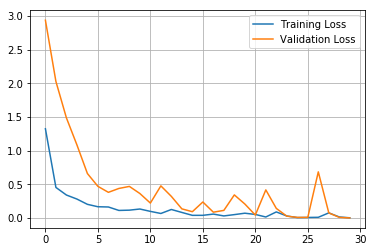

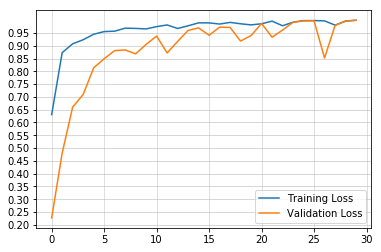

In [10]:
plt.figure()
plt.show()
plt.plot(tl, label='Training Loss')
plt.plot(vl, label='Validation Loss')
plt.legend(loc='upper right')
plt.grid()

fig = plt.figure()                                                               
ax = fig.add_subplot(1,1,1)                                                      

# major ticks and minor ticks settings                                     
major_ticks = np.arange(0, 1, .05)                                              
minor_ticks = np.arange(0, 1, .05)                                                                                      
ax.set_yticks(major_ticks)                                                       
ax.set_yticks(minor_ticks, minor=True)                                           

# and a corresponding grid                                                       

ax.grid(which='both')                                                            

# or if you want differnet settings for the grids:                               
ax.grid(which='minor', alpha=0.2)                                                
ax.grid(which='major', alpha=0.5)
ax.plot(ta, label='Training Loss')
ax.plot(va, label='Validation Loss')
ax.legend(loc='lower right')

### Cell 3e: Final accuracy on test data

In [11]:
with tf.Session() as sess:    
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, './raw_dataa' )
    test_accuracy,m,_ = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.954


---

## Cell 4: Data Augmentation
 As shown in the above plots and cell 3e, although accuracy on test data is very high but there is an obvious case for overfitting. To avoid this issue, data augmentation will be carried out. 
 



## Cell 4a: Data Augmentation Library

Library for data augmentation, used for this work, is here

https://github.com/aleju/imgaug
 

In [12]:
def aug_img(image,class_val):
    



    img_bgr = cv2.cvtColor(np.squeeze(image),cv2.COLOR_RGB2BGR)
    
    
    #  Add gaussian blur
    gauss_blur = iaa.AdditiveGaussianNoise(loc=0, scale=(0, 0.2), per_channel=0.5) # always horizontally flip each input image
    img_aug01 = gauss_blur.augment_image(img_bgr) # horizontally flip image 0
    
    # add brightness
    add_brightness = iaa.Add((-3, 3), per_channel=0.5)
    img_aug1 = add_brightness.augment_image(img_aug01)
   
     # add sharpness
    add_sharp = iaa.Sharpen(alpha=(0, 1.0), strength=(0.75, 1.5))
    img_aug2 = add_sharp.augment_image(img_aug1)
    
    # add contract normlaization
    rot = iaa.ContrastNormalization((0.5, 2.0), per_channel=0.5)
    img_aug = rot.augment_image(img_aug2)
    

    
    dest = cv2.cvtColor(img_aug,cv2.COLOR_BGR2RGB)
#    print(np.shape(dest))
    
    
    
    
#    plt.figure()
#    plt.imshow(dest)
#    
#    
#    print(np.all((image-dest)==0))
    return dest ,class_val


## Cell 4b: Creating Augemented images

Number of training data = 76339


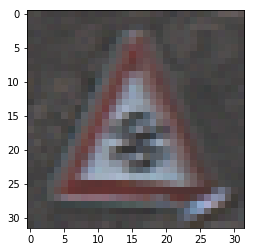

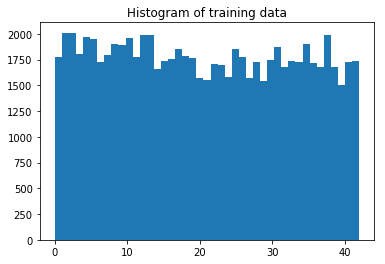

In [13]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2
import skimage

# get older data
X_train, y_train = train['features'], train['labels']

    
freq = []
# Get number of occurence of each training label
for q in range(n_classes):
    freq.append(list(y_train).count(q))


aug_mag_new = np.zeros(n_classes)
indices = np.zeros(n_classes)

# Calculate how many maximum images to be added for a class
for a_class in range(n_classes):

    # Calculate magnitude of  images to be added for a class
    aug_mag = max(freq) - freq[a_class]
 
    # make this number random
    aug_mag_new[a_class] = np.ceil((np.random.uniform(0.7 , 0.9))* aug_mag)



#Assign meemory for total new images
tot =   np.int(np.sum(aug_mag_new))
feat  =  list(np.zeros(  (tot, 32,32,3) ) )
lab  =  list(np.zeros( tot ))

t = 0

# Now doing augmentation
for h in (range(n_classes)):
    
    indices = np.where(y_train == h)[0]
     
    for s in range(np.int(aug_mag_new[h])):  
    
        val = indices[np.random.randint(0,len(indices))]
        #aug_img
        feat[t],lab[t]= aug_img(X_train[val],h) 
        
        t += 1
        
plt.figure()
plt.imshow(feat[np.random.randint(0,len(feat))].squeeze())


train_feat = np.vstack((X_train,feat))
train_lab = np.hstack((y_train,lab))

plt.figure()
plt.hist(train_lab,43)
plt.title("Histogram of training data")

#train_feat= np.uint8(train_feat)
#train_lab= np.uint8(train_lab)

X_train = np.copy(train_feat)
y_train = np.copy(train_lab)

X_train = np.float32(X_train)
y_train = np.int32(y_train)
X_train, y_train = shuffle(X_train, y_train)
del train_feat
del train_lab
print("Number of training data =", len(X_train))


In [14]:
X_train = np.float32(X_train)
X_train_normal = np.copy(X_train)
# Normalizing the training data
for q in range(len(X_train)):
    X_train[q][:,:,0] = (X_train_normal[q][:,:,0] - 128)/128.
    X_train[q][:,:,1] = (X_train_normal[q][:,:,1] - 128)/128.
    X_train[q][:,:,2] = (X_train_normal[q][:,:,2] - 128)/128.

print("Done")


Done



## Cell 5: Training with augmented data

In [46]:
BATCH_SIZE = 256
EPOCHS = 30
softmax = tf.nn.softmax(logits)
pred = tf.nn.top_k(softmax, 5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
#    saver.restore(sess, tf.train.latest_checkpoint('.'))
   
    print("Training with new data and activating dropoffs...")
   
    tl = []
    ta = []
    vl = [] 
    va = [] 
    for i in range(EPOCHS):
        
        X_train, y_train = shuffle(X_train, y_train)
        loss_p_epoch = 0.0         # training loss per epoch
        acc_p_epoch = 0.0          # training accuracy per epoch
        total_batches = int( num_examples / BATCH_SIZE )
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            _, a,c,summary = sess.run([training_operation , accuracy_operation, loss_operation, merged_summary_op], feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
            loss_p_epoch += c 
            acc_p_epoch  += (a * BATCH_SIZE)
   
        validation_accuracy, valid_loss,_ = evaluate(X_valid, y_valid)
    
        if (i % 1 == 0):
            print("EPOCH {} ...".format(i+1))
            print("Training Loss = {:.3f}".format(loss_p_epoch/total_batches))
            print("Validation Loss = {:.3f}".format(valid_loss))
            print("Training Accuracy = {:.3f}".format(acc_p_epoch/num_examples))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()
        tl.append(loss_p_epoch/total_batches)
        vl.append(valid_loss)
        ta.append(acc_p_epoch/num_examples)
        va.append(validation_accuracy)
    
    np.savez("res_rn",tl,vl,ta,va,EPOCHS)
    saver.save(sess, './new_dataa')
#    print("Final Validation Accuracy = {:.3f}".format(validation_accuracy))
    print("Model saved")

Training with new data and activating dropoffs...
EPOCH 1 ...
Training Loss = 2.552
Validation Loss = 1.670
Training Accuracy = 0.301
Validation Accuracy = 0.469

EPOCH 2 ...
Training Loss = 1.192
Validation Loss = 0.879
Training Accuracy = 0.635
Validation Accuracy = 0.722

EPOCH 3 ...
Training Loss = 0.833
Validation Loss = 0.702
Training Accuracy = 0.745
Validation Accuracy = 0.786

EPOCH 4 ...
Training Loss = 0.649
Validation Loss = 0.535
Training Accuracy = 0.801
Validation Accuracy = 0.834

EPOCH 5 ...
Training Loss = 0.539
Validation Loss = 0.381
Training Accuracy = 0.836
Validation Accuracy = 0.890

EPOCH 6 ...
Training Loss = 0.460
Validation Loss = 0.285
Training Accuracy = 0.863
Validation Accuracy = 0.926

EPOCH 7 ...
Training Loss = 0.399
Validation Loss = 0.235
Training Accuracy = 0.882
Validation Accuracy = 0.937

EPOCH 8 ...
Training Loss = 0.368
Validation Loss = 0.190
Training Accuracy = 0.893
Validation Accuracy = 0.952

EPOCH 9 ...
Training Loss = 0.329
Validation L

## Cell 5a:

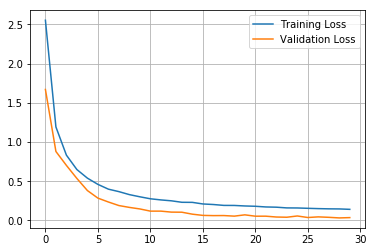

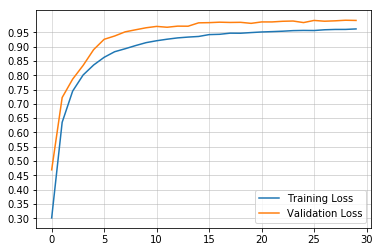

In [47]:
plt.figure()
plt.show()
plt.plot(tl, label='Training Loss')
plt.plot(vl, label='Validation Loss')
plt.legend(loc='upper right')
plt.grid()

fig = plt.figure()                                                               
ax = fig.add_subplot(1,1,1)                                                      

# major ticks and minor ticks settings                                     
major_ticks = np.arange(0, 1, .05)                                              
minor_ticks = np.arange(0, 1, .05)                                                                                      
ax.set_yticks(major_ticks)                                                       
ax.set_yticks(minor_ticks, minor=True)                                           

# and a corresponding grid                                                       

ax.grid(which='both')                                                            

# or if you want differnet settings for the grids:                               
ax.grid(which='minor', alpha=0.2)                                                
ax.grid(which='major', alpha=0.5)
ax.plot(ta, label='Training Loss')
ax.plot(va, label='Validation Loss')
ax.legend(loc='lower right')

## Cell 5b:

In [243]:
with tf.Session() as sess:
    
    
    saver.restore(sess, './new_dataa' )
    test_accuracy,m,_ = evaluate(X_test, y_test)
    print("Test Accuracy after training on augmented dataset= {:.3f}".format(test_accuracy))


Test Accuracy after training on augmented dataset= 0.961


## Cell 6:

Imported New images


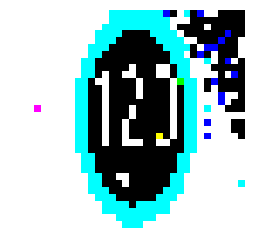

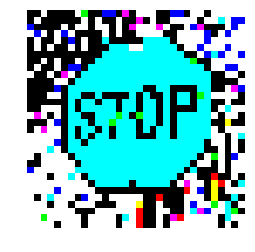

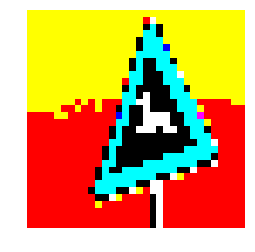

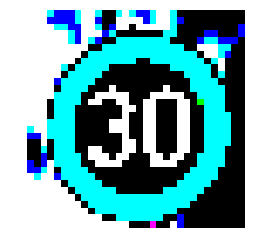

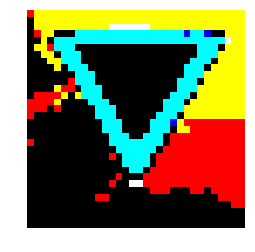

In [121]:
import matplotlib.gridspec as gridspec
import cv2
from glob import glob
from PIL import Image 

dest=[]
img_mask = 'images2/*.jpg'
img_names = glob(img_mask)




for fn in img_names:
    
    img1 = cv2.imread(fn)

    img =  cv2.resize(img1, (32,32))
   
    dest.append(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))


labels = [8,14,31,1,13]




nlabels= np.int32(labels)
images= np.copy(dest)

for q in range(len(dest)):
    images[q][:,:,0] = (dest[q][:,:,0] - 128)/128.
    images[q][:,:,1] = (dest[q][:,:,1] - 128)/128.
    images[q][:,:,2] = (dest[q][:,:,2] - 128)/128.

nimages = np.float32(images)

print("Imported New images")



for i in range(5):
    plt.figure(i)
    plt.imshow(nimages[i].squeeze())
    plt.axis('off')
plt.show()


## Cell 6a: Calculating individual probabilities of prediction and overall accuracy for new images


In [235]:

init = tf.global_variables_initializer()

with tf.Session() as sess2:
    #
    saver.restore(sess2, './new_dataa' )
    
    test_accuracy,m,re = evaluate(nimages, nlabels)
    print("Test Accuracy after training on new image dataset= {:.3f}".format(test_accuracy))
    
    result = sess2.run(pred, feed_dict={x: np.array(nimages),y: nlabels,keep_prob: 1.})
    predictions  = result.values
    predictionIndicies  = result.indices
    print(predictions )
    print(  predictionIndicies,"\n \n")

    
# Another method of prinitng lsoft probs   
#     predicted_logits = sess2.run(logits, feed_dict={x: np.array(nimages), y: nlabels, keep_prob:1.})
#     predicted_labels = np.argmax(predicted_logits, axis=1)
#     print(predicted_labels)
    
    
        
    test_accuracy,m,re = evaluate(nimages, nlabels)
    print("Test Accuracy after training on new image dataset= {:.3f}".format(test_accuracy))
#     labels = [8,14,31,1,13]

Test Accuracy after training on new image dataset= 0.000
[[  6.78633869e-01   1.72174767e-01   5.66593036e-02   3.22436839e-02
    1.78901143e-02]
 [  1.61391765e-01   1.57363921e-01   1.54916242e-01   9.32914764e-02
    6.04805648e-02]
 [  5.22530496e-01   4.17559206e-01   2.96607055e-02   1.57969557e-02
    9.62205697e-03]
 [  4.84996259e-01   3.09177727e-01   7.67066330e-02   7.53336623e-02
    1.44790364e-02]
 [  8.07226181e-01   1.92117497e-01   3.44052212e-04   1.12481059e-04
    8.80108200e-05]]
[[ 8  0  1  4 14]
 [ 1 14 32  6  8]
 [31 20 25 30 23]
 [ 1  0  4 18 14]
 [ 1  4  2 12 18]] 
 

Test Accuracy after training on new image dataset= 0.600


## Cell 6b: Collecting Labels from CSV file


In [236]:
import csv
filename = './signnames.csv'

num = []
name = []

with open(filename) as f:
    next(f)
    reader = csv.reader(f)
    for row in reader:
        num.append(row[0])
        name.append(row[1])
        
list_labels = np.array(num,dtype = int)        

## Cell 6b: Plotting results of predictions

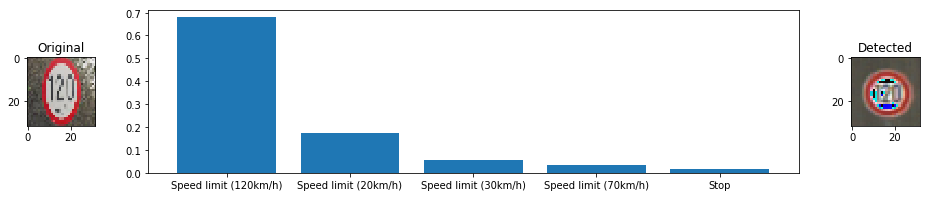

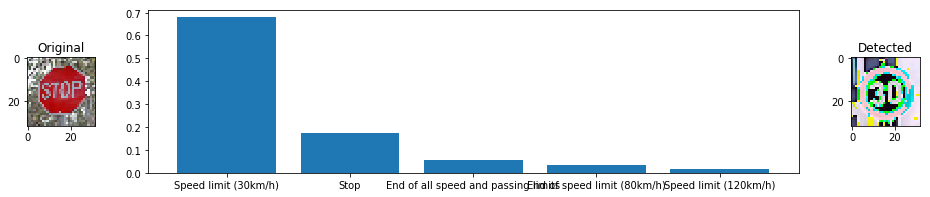

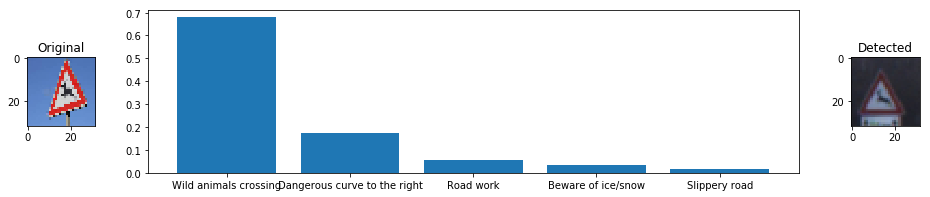

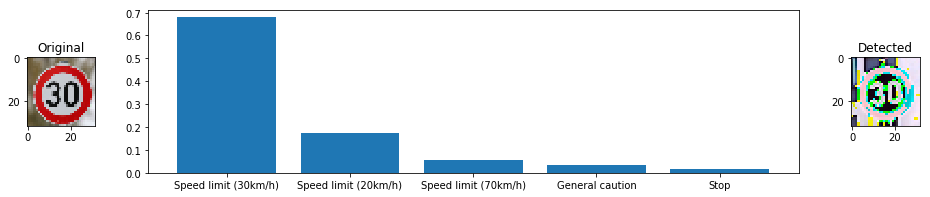

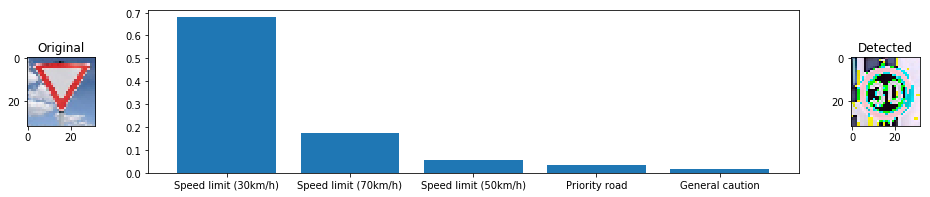

In [239]:
for m in range(len(nlabels)):


    xvals = []


    plt.figure(figsize=(16,3))
    gs = gridspec.GridSpec(1, 3,width_ratios=[2,19,2])

    # Plotting original
    ax1 = plt.subplot(gs[0])
    ax1.imshow(dest[m].squeeze())
    ax1.set_title("Original")
    
    # Plotting probabilities
    ax2 = plt.subplot(gs[1])
    ax2.bar(range(len(predictions[0])),predictions[0],align= "center")


    for r in range(5):            # This "5" actually should be top N max probabilities 
        vals =  predictionIndicies[m,r]
       # print(vals)
        xvals.append(name[vals])


    ax2.set_xticklabels([0]+xvals)
    
    # Plotting what was actually detected using a sample image from training data
    ax3 = plt.subplot(gs[2])
    
    w = np.where(y_train == predictionIndicies[m,0])[0][1]    
    ax3.imshow(X_train[w].squeeze())
    ax3.set_title("Detected")







## Cell 7a: Getting feature maps from the Convolutional network

In [20]:
### Visualize your network's feature maps here.


# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session= tf.get_default_session(),feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(25,25))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
    plt.show()
    print("\n \n")

## Cell 7b: Plotting results for from the two convolutional layers after Relu activations

Initial Image 
 
 



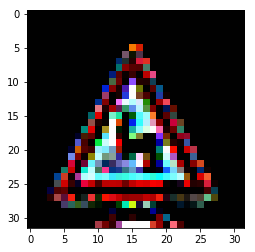

Normlized Image 
 
 



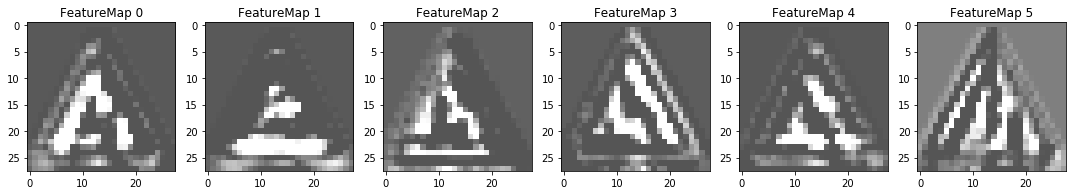

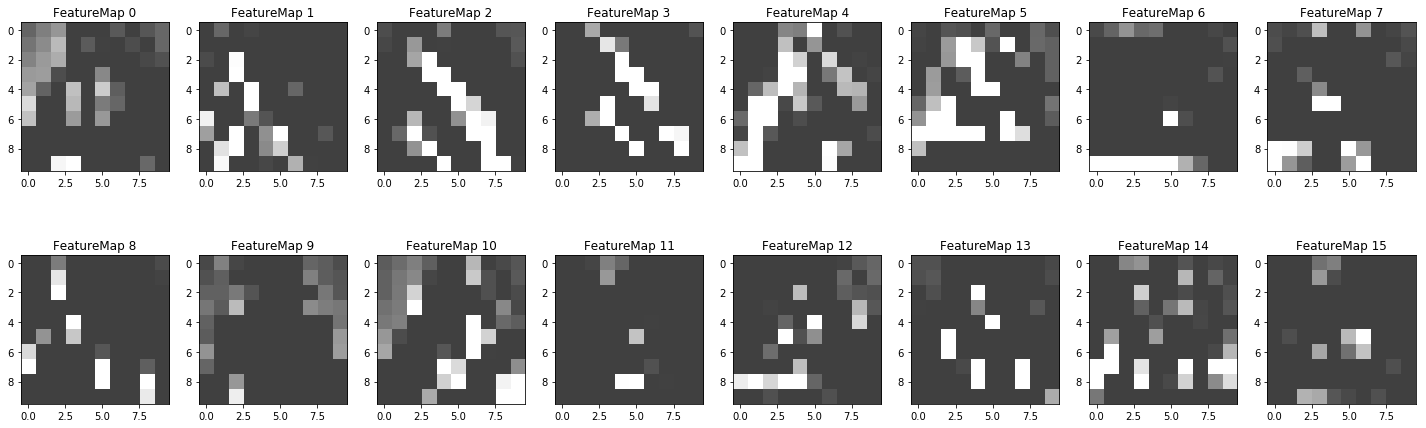

In [241]:

# Get the indexed value from above
image = X_train[index].squeeze()
print("Initial Image \n \n \n")
plt.figure(1)
plt.imshow(image)
z = np.resize(image,(1,32,32,3))
             
plt.show()

print("Normlized Image \n \n \n")

init = tf.global_variables_initializer()
#sess2 = tf.get_default_session()

with tf.Session() as sess2:
    sess2.run(init)
    saver.restore(sess2, './new_dataa' )

    my_tensor = sess2.graph.get_tensor_by_name('con1r:0')
    outputFeatureMap(z,my_tensor,-1,2)

    my_tensor = sess2.graph.get_tensor_by_name('con2r:0')
    outputFeatureMap(z,my_tensor,-1,3)
    
    

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:** The code for visualizing layers of the CNN is shown above . First figure shows the input to layer 1 of the 
CNN while figures 2 and 3  are the outputs from the convolutions layers having depths of 6 and 16 each. Here it can be seen that the first layer can detect different edges in the figure while the batch  of filters in the next layer collect more features about the yield sign, and pass it onto the next layers which flattens the information and eventually leads to image detection. One observation i have made is that the first convolution layer does well in detecting edges. Hence, grayscaling in pre-processing would  not have been that beneficial as the convolutional network is capable of doing it itself. Additional color information which is taken from RGB layers will help gather more information towards correct prediction. Hence, not doing grayscaling does not turn out to be harmful at the end.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Attached!